# PyCaret: The Swiss Army Knife for Machine Learning!! 🛠️🔥

PyCaret is an open-source Python library for automating machine learning workflows. It provides a high-level interface that simplifies the end-to-end process of developing machine learning models. Here are the advantages of using PyCaret:

- Streamlined Workflow: PyCaret offers a consistent and intuitive API, allowing users to perform complex machine learning tasks with minimal code and effort.

- Automated Preprocessing: It automates common data preprocessing steps like handling missing values, feature scaling, categorical encoding, and more, saving time and effort.

- Model Selection and Tuning: PyCaret provides a range of algorithms and automated techniques for model selection, hyperparameter tuning, and ensemble building, enabling users to find the best performing model easily.

- Comparative Analysis: It allows for quick comparison and evaluation of multiple models, enabling users to identify the top-performing algorithms for their specific problem.

- Explainability and Interpretability: PyCaret provides tools to interpret and explain model predictions, facilitating model transparency and aiding in decision-making.

- Deployment Ready: PyCaret offers functionalities to export models in a production-ready format, allowing seamless integration into production systems.

- Comprehensive Visualization: It provides interactive visualizations for exploring data, model performance, and feature importance, aiding in better understanding and communication of results.

- Support for Tabular Data: PyCaret specializes in handling structured/tabular data, making it suitable for a wide range of business and research applications.

- Community and Documentation: PyCaret has an active community of users, along with detailed documentation and tutorials, making it easier to get started and seek help when needed.

- Scalability: PyCaret is designed to handle large datasets and can efficiently process and analyze extensive amounts of data, making it suitable for big data applications.

In summary, PyCaret simplifies the end-to-end machine learning process, automates repetitive tasks, provides model selection and tuning capabilities, and offers interpretability and deployment readiness, all while being scalable and well-documented.








## Regression Models with Pycaret

In [1]:
from pycaret.regression import *

In [4]:
# load the dataset from pycaret
from pycaret.datasets import get_data
dataset = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### EDA

In [6]:
dataset = get_data('insurance',profile = True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Splitting the dataset into data for modeling and unseen data for predictions

In [7]:
# Randomly sample 90% of the dataset for modeling, with a fixed random state for reproducibility
data = dataset.sample(frac=0.9, random_state=43)

# Drop the sampled data from the original dataset to obtain the remaining 10% for unseen predictions
data_unseen = dataset.drop(data.index)

# Reset the index of the 'data' DataFrame after sampling, dropping the original index
data.reset_index(drop=True, inplace=True)

# Reset the index of the 'data_unseen' DataFrame after sampling, dropping the original index
data_unseen.reset_index(drop=True, inplace=True)

# Print the shape of the 'data' DataFrame, indicating the number of rows and columns for modeling
print('Data for Modeling: ' + str(data.shape))

# Print the shape of the 'data_unseen' DataFrame, indicating the number of rows and columns for predictions
print('Unseen Data For Predictions ' + str(data_unseen.shape))


Data for Modeling: (1204, 7)
Unseen Data For Predictions (134, 7)


#### Preprocessing

In [9]:
dataset = setup(data = data, target = 'charges',
                session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 7)"
4,Transformed data shape,"(1204, 10)"
5,Transformed train set shape,"(842, 10)"
6,Transformed test set shape,"(362, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


#### Model Training

In [12]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2619.8558,21521902.8624,4558.9417,0.8325,0.4275,0.3088,0.0440
catboost,CatBoost Regressor,2711.2808,22388754.0102,4674.0387,0.8249,0.4589,0.3197,0.1800
lightgbm,Light Gradient Boosting Machine,2839.2406,22472777.9409,4670.4081,0.8247,0.5096,0.3536,0.1180
rf,Random Forest Regressor,2796.1122,23893280.7482,4824.8996,0.8139,0.4727,0.3377,0.0910
xgboost,Extreme Gradient Boosting,2997.9542,25939191.7000,5033.5739,0.7982,0.5200,0.3650,0.0450
et,Extra Trees Regressor,2796.2007,26318819.4160,5069.8921,0.7936,0.4914,0.3347,0.0800
ada,AdaBoost Regressor,4226.6501,27604026.6249,5229.9675,0.7842,0.6132,0.6954,0.0280
ridge,Ridge Regression,4227.3959,37256271.5178,6075.5876,0.7128,0.5539,0.4122,0.0240
br,Bayesian Ridge,4220.6657,37252852.4845,6075.4023,0.7127,0.5538,0.4110,0.0250
lr,Linear Regression,4212.8933,37249561.9549,6075.2490,0.7126,0.5543,0.4095,0.4240


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

#### Hyperparameter tuning

In [13]:
tuned_best = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3093.2234,23517140.6654,4849.4475,0.8694,0.6562,0.4741
1,2820.8289,21045185.6056,4587.5032,0.8271,0.5669,0.4634
2,2659.1030,14427005.4824,3798.2898,0.8835,0.4832,0.4449
3,3830.4357,42170425.2727,6493.8760,0.7267,0.6143,0.3871
4,3320.4511,24687477.9536,4968.6495,0.7240,0.5189,0.4380
5,3440.7077,30635038.8621,5534.8929,0.7500,0.7983,0.4127
6,4167.4366,45398004.2548,6737.8041,0.5443,0.6523,0.4902
7,3337.7779,26715191.9978,5168.6741,0.8360,0.4705,0.3745
8,3149.3599,28891016.2817,5375.0364,0.8488,0.7823,0.3541


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### Evaluate a model

In [14]:
# check the residuals of trained model
plot_model(tuned_best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…

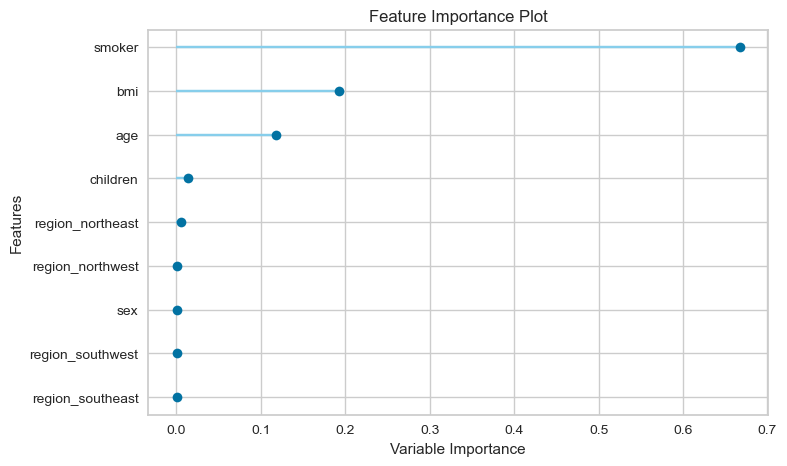

In [15]:
# check feature importance
plot_model(tuned_best, plot = 'feature')

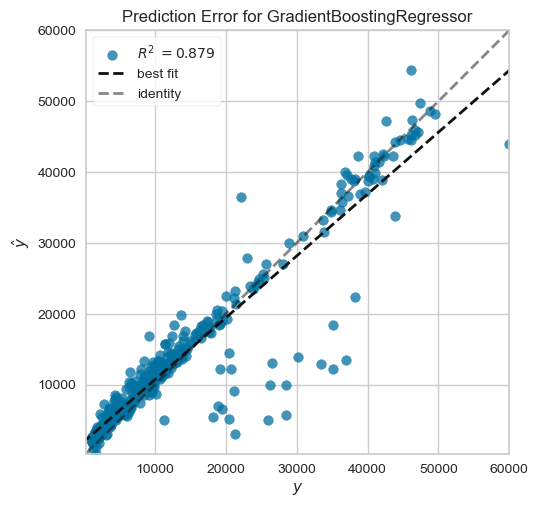

In [16]:
plot_model(tuned_best, plot = 'error')

In [17]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Evaluate with test data

Before finalizing the model, it is recommended to perform a final check by predicting the test set and reviewing the evaluation metrics. All of the evaluation metrics we've seen above are cross-validated results based **only on the training set (70%)**. Now, we are going to use the test data to see if the performance is different and there may be overfitting.

In [18]:
predict_model(tuned_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2381.2941,19939685.4253,4465.3875,0.8787,0.3939,0.2864


,age,sex,bmi,children,smoker,region,charges,prediction_label
630,42,male,24.605000,2,yes,northeast,21259.378906,23269.803432
228,61,male,36.299999,1,yes,southwest,47403.878906,49767.765674
136,50,female,28.120001,3,no,northwest,11085.586914,11559.201703
685,58,female,39.049999,0,no,southeast,11856.411133,14580.679541
971,63,female,37.700001,0,yes,southwest,48824.449219,48626.799008
...,...,...,...,...,...,...,...,...
274,18,female,28.215000,0,no,northeast,2200.830811,2829.832151
691,18,male,33.660000,0,no,southeast,1136.399414,2603.811896
907,32,male,33.820000,1,no,northwest,4462.721680,7546.724611
317,55,male,28.975000,0,no,northeast,10796.350586,12422.489566


#### Saving a model

In [19]:
# finalize the model
final_best = finalize_model(tuned_best)

# save model to disk
save_model(final_best, 'insurance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/zv/p7xt_sh13ms7rqv0xt8p0rsh0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encodin...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype('O'),
                                                    

#### Prections on unseen data

In [20]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2839.7922,27526131.2842,5246.5352,0.8185,0.4881,0.3410


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,31,female,25.740000,0,no,southeast,3756.621582,4273.960742
1,52,female,30.780001,1,no,northeast,10797.335938,13988.874628
2,19,female,28.600000,5,no,southwest,4687.796875,5861.640061
3,63,male,28.309999,0,no,northwest,13770.097656,14098.508661
4,18,female,38.665001,2,no,northeast,3393.356445,7804.128556
